# Deep Learning Project 
## LE Thi Hoa - p2310380

## Part 1 : Perceptron Indicate the size of each tensor of the provided file perceptron_pytorch.py. Explain. 
In file perceptron_pytorch.py, we have the tensors: 
- “data_train” is the training data, which is a tensor containing training samples from the MNIST dataset. The size of “data_train” is (number of training samples, number of features).
- The size of tensor data_train = torch.Size([63000, 784])
- “label_train” is the corresponding label for the training data. The size of “label_train” is (number of training samples, number of classes). 
- The size of tensor label_train = torch.Size([63000, 10])
- “data_test” is the testing data, containing test samples from the MNIST dataset. The size of “data_test” is (number of testing samples, number of features).
- The size of tensor data_test = torch.Size([7000, 784])
- “Label_test” is the corresponding label for the testing data. The size of “label_test” is (number of testing samples, number of classes).
- The size of tensor label_test = torch.Size([7000, 10])
- “w” is a tensor that contains the model's weights. The size of “w” is (the number of features, the number of classes). It is initialized with random values in the range from -0.001 to 0.001.
- The size of tensor w = torch.Size([784, 10])
- “b” is a tensor that contains bias values of the model. The size of  “b” is (1, number of classes), and it is also initialized with random values in the range from -0.001 to 0.001.
- The size of tensor b = torch.Size([1, 10])


In [5]:
import torch, gzip
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [2]:
# read data
((data_train, label_train), (data_test, label_test)) = torch.load(gzip.open("mnist.pkl.gz"))

print("Size of data_train", data_train.shape)
print("Size of lable_train", label_train.shape)
print("Size of data_test", data_test.shape)
print("Size of label_test", label_test.shape)

Size of data_train torch.Size([63000, 784])
Size of lable_train torch.Size([63000, 10])
Size of data_test torch.Size([7000, 784])
Size of label_test torch.Size([7000, 10])


In [3]:
def imshow(img, figsize=(2, 2)):
    fig, ax = plt.subplots(1, 1, figsize=(figsize))
    ax.axis('off')
    ax.imshow(img)

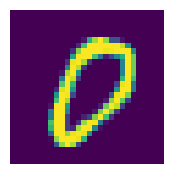

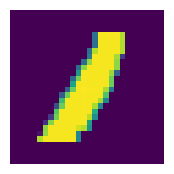

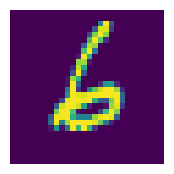

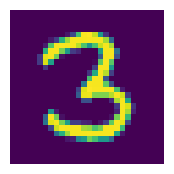

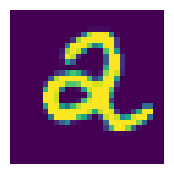

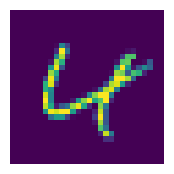

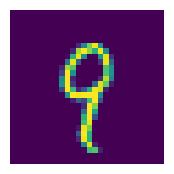

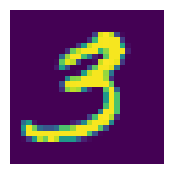

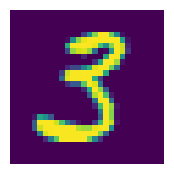

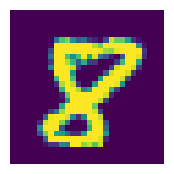

In [10]:
for i in range(10): 
    imshow(np.array(data_train[i], dtype='float').reshape(28, 28))

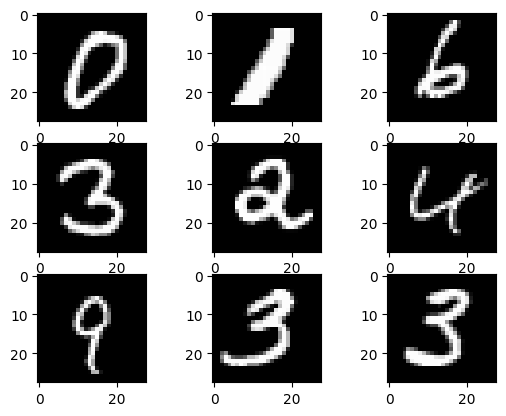

In [11]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(np.array(data_train[i], dtype='float').reshape(28, 28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Part 2: Shallow network
- In this part, you will implement a MLP with only one hidden layer and a linear output layer.
- By taking inspiration from perceptron_pytorch_data_auto_layer_optim.py, implement a shallow network using the tools provided by PyTorch.
- Find some hyperparameters (η and the number of neurons in the hidden layer) that provide a good performance. Explain precisely your methodology and the influence of each hyperparameter on the performance.

In [8]:
batch_size = 5  # number of data read each time
nb_epochs = 10  # number of time the dataset will be read

In [9]:
# initialising the data loaders
train_dataset = torch.utils.data.TensorDataset(data_train, label_train)
test_dataset = torch.utils.data.TensorDataset(data_test, label_test)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [15]:
# Define simple MLP model
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(self.relu(x))
        x = self.fc2(x)
        return x

In [28]:
def train_model_SimpleMLP(learning_rate, hidden_size):
    
    # Define
    input_size = data_train.shape[1]  # Number of input features (corresponding to MNIST image size)
    output_size = label_train.shape[1]  # Size of output (corresponding to digits 0 to 9)

    # Define model simpleMLP
    model = SimpleMLP(input_size, hidden_size, output_size)
    
    # Define loss function and optimizer
    criterion = nn.MSELoss(reduction='sum')
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(5):  # number of iteration (epoch)
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
    
    # Evaluate the model on the test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output, 1)
            _, labels = torch.max(target, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch}: Accurary = {accuracy}")
    
    return accuracy
    

In [33]:
# Try the other values of learning_rate and hiddien_size
learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [64, 128, 256]

best_accuracy = 0.0
best_hidden_size = 0
best_learning_rate = 0.0

store_ = {}

for lr in learning_rates:
    for hs in hidden_sizes:
        print(f"Training with learning rate {lr} and hidden size {hs}")
        acc = train_model_SimpleMLP(lr, hs)
        
        # Check if this combination is the best so far
        if acc > best_accuracy:
            best_accuracy = acc
            best_hidden_size = hs
            best_learning_rate = lr
    
print(f"Best Hidden Size: {best_hidden_size}, Best Learning Rate: {best_learning_rate}, Best Accuracy: {best_accuracy:.2f}%")

Training with learning rate 0.001 and hidden size 64
Epoch 4: Accurary = 84.88571428571429
Training with learning rate 0.001 and hidden size 128
Epoch 4: Accurary = 85.57142857142857
Training with learning rate 0.001 and hidden size 256
Epoch 4: Accurary = 85.94285714285714
Training with learning rate 0.01 and hidden size 64
Epoch 4: Accurary = 82.88571428571429
Training with learning rate 0.01 and hidden size 128
Epoch 4: Accurary = 81.75714285714285
Training with learning rate 0.01 and hidden size 256
Epoch 4: Accurary = 84.45714285714286
Training with learning rate 0.1 and hidden size 64
Epoch 4: Accurary = 9.785714285714286
Training with learning rate 0.1 and hidden size 128
Epoch 4: Accurary = 9.785714285714286
Training with learning rate 0.1 and hidden size 256
Epoch 4: Accurary = 9.785714285714286
Best Hidden Size: 256, Best Learning Rate: 0.001, Best Accuracy: 85.94%


### Explandation

## Part 3 : Deep network
- As you are now more familar with PyTorch, you can use it to test deeper models.
- Implement a deep network (i.e. with at least two hidden layers) using the tools
provided by PyTorch.
- Find some hyperparameters (η, number of hidden layers and the number of
neurons in the hidden layers) that provide a good performance. 
- Explain precisely your methodology and the influence of each hyperparameter on the per- formance.


In [152]:
import itertools

# Define a list of values to search for hidden_size and learning_rate
hidden_sizes = [64, 128, 256]
learning_rates = [0.01, 0.1, 0.001]

best_accuracy = 0.0
best_hidden_size = 0
best_learning_rate = 0.0

for hidden_size, learning_rate in itertools.product(hidden_sizes, learning_rates):
    # Create a new model with the current hidden_size and learning_rate
    model = MLP(input_size, hidden_size, output_size)
    
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(nb_epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output, 1)
            _, labels = torch.max(target, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    # Check if this combination is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hidden_size = hidden_size
        best_learning_rate = learning_rate

print(f"Best Hidden Size: {best_hidden_size}, Best Learning Rate: {best_learning_rate}, Best Accuracy: {best_accuracy:.2f}%")


Best Hidden Size: 64, Best Learning Rate: 0.001, Best Accuracy: 85.66%


In [147]:
# Define
input_size = data_train.shape[1]  #  # Number of input features (corresponding to MNIST image size)
hidden_size = 64  # Number of neurons in the hidden layer
output_size = label_train.shape[1]  # Size of output (corresponding to digits 0 to 9)

In [141]:
# model initialisation
model = MLP(input_size, hidden_size, output_size)

In [144]:
# Define loss function and optimizer
criterion = nn.MSELoss(reduction='sum')
# Using (SGD) và learning rate (η) 0.001
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [145]:
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [146]:
for n in range(nb_epochs):
    # reading all the training data
    for x, t in train_loader:
        # computing the output of the model
        y = model(x)
        # updating weights
        loss = criterion(t,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    # testing the model (test accuracy is computed during training for monitoring)
    acc = 0.0
    # reading all the testing data
    for x, t in test_loader:	
        # computing the output of the model
        y = model(x)
        # checking if the output is correct
        acc += torch.argmax(y,1) == torch.argmax(t,1)
        
    # printing the accuracy
    print(acc/data_test.shape[0])


tensor([0.8567])
tensor([0.8530])
tensor([0.8617])
tensor([0.8579])
tensor([0.8573])
tensor([0.8560])
tensor([0.8631])
tensor([0.8624])
tensor([0.8559])
tensor([0.8571])


## Part 3 : Deep network
- As you are now more familar with PyTorch, you can use it to test deeper models.
- Implement a deep network (i.e. with at least two hidden layers) using the tools
provided by PyTorch.
- Find some hyperparameters (η, number of hidden layers and the number of
neurons in the hidden layers) that provide a good performance. Explain precisely your methodology and the influence of each hyperparameter on the performance.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Chuẩn bị dữ liệu
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# Định nghĩa mô hình
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Huấn luyện mô hình
def train_model(learning_rate, hidden_size):
    input_size = 28 * 28  # MNIST image size
    output_size = 10  # 10 classes (digits 0-9)

    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(5):  # Chỉ là ví dụ, bạn có thể tăng số epoch
        for data, target in train_loader:
            data = data.view(-1, 28 * 28)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

# Thử nghiệm với các giá trị khác nhau
learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [64, 128, 256]

for lr in learning_rates:
    for hs in hidden_sizes:
        print(f"Training with learning rate {lr} and hidden size {hs}")
        train_model(lr, hs)


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Chuẩn bị dữ liệu
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# Định nghĩa mô hình CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Huấn luyện mô hình CNN
def train_cnn(learning_rate):
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(5):  # Chỉ là ví dụ, bạn có thể tăng số epoch
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

# Thử nghiệm với các giá trị khác nhau
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"Training with learning rate {lr}")
    train_cnn(lr)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Chuẩn bị dữ liệu
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# Định nghĩa mô hình MLP
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hàm huấn luyện
def train_mlp(hidden_size, learning_rate):
    model = MLP(hidden_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(5):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    return model

# Hàm đánh giá
def evaluate(hidden_size, learning_rate):
    model = train_mlp(hidden_size, learning_rate)

    # Đoạn code để đánh giá model ở đây (ví dụ: accuracy trên tập kiểm tra)
    # ...

# Thử nghiệm với các giá trị khác nhau
learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [128, 256, 512]

for lr in learning_rates:
    for hs in hidden_sizes:
        accuracy = evaluate(hs, lr)
        print(f'Learning Rate: {lr}, Hidden Size: {hs}, Accuracy: {accuracy}')
